In [104]:
import joblib 
import pandas as pd
import numpy as np

from plotnine import ggplot, aes, geoms, theme, ggtitle, ylim, xlim, ylab
from plotnine import element_blank, element_line, element_text, scales, annotate, facet_wrap

with open('Results/Frame_results.pkl','rb') as File:
    Results = joblib.load(File)

In [194]:
result_df = []
corr_df = []
for i in Results:
    if i['topic'] not in ['tribute','procedural','armenian_genocide']:
        df = i['corr_values']
        df['year'] = i['year']
        df['topic'] = i['topic']
        corr_df.append(df)

        result_df.append(i['results'])
    
corr_df = pd.concat(corr_df)
result_df = pd.DataFrame(result_df)

# mean center SD = 1
result_df['partisanship_st'] = result_df.partisanship.transform(lambda x: (x-x.mean())/x.std())
result_df['polarization_st'] = result_df.polarization.transform(lambda x: (x-x.mean())/x.std())

### Polarization trends by topic

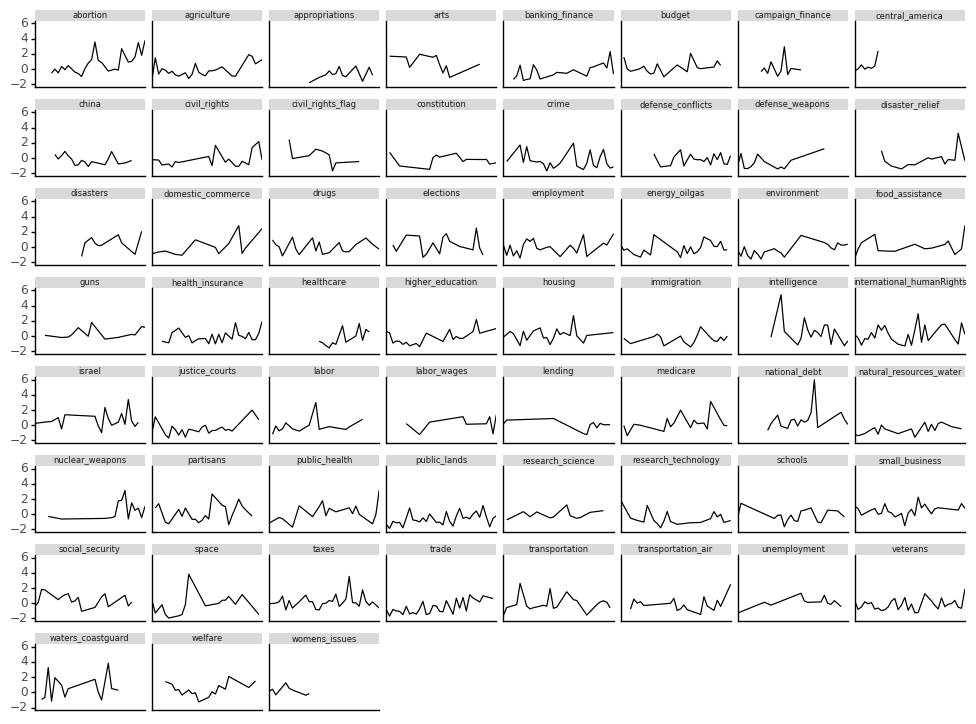

<ggplot: (8770133387960)>

In [195]:
(
    ggplot(result_df,aes(x='year',y='polarization_st')) + 
    geoms.geom_line() + 
    facet_wrap('~topic') + 
    theme(axis_title=element_blank(),
          figure_size=(12,12),
          aspect_ratio = 0.6,
          axis_line=element_line(),
          panel_background=element_blank(),
          strip_text=element_text(size=6)) +
    scales.scale_x_continuous(expand = [0,0],breaks = [])
)

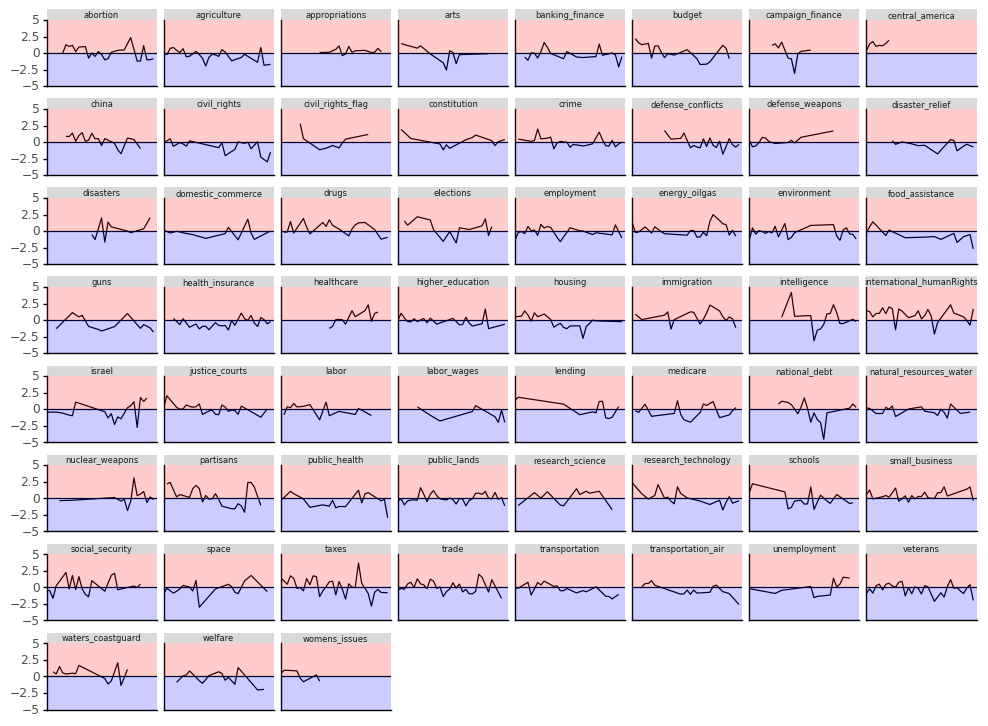

<ggplot: (8770219719434)>

In [196]:
(
    ggplot(result_df,aes(x='year',y='partisanship_st')) + 
    geoms.geom_line() + 
    facet_wrap('~topic') + 
    annotate('segment',x=1983,xend=2017,y=0,yend=0) +
    annotate("rect", xmin=1983,xmax=2017,ymin=0,ymax=-5,alpha=0.2,fill='blue') +
    annotate("rect", xmin=1983,xmax=2017,ymin=0,ymax=5,alpha=0.2,fill='red') +
    theme(axis_title=element_blank(),
          figure_size=(12,12),
          aspect_ratio = 0.6,
          axis_line=element_line(),
          panel_background=element_blank(),
          strip_text=element_text(size=6)) +
    scales.scale_x_continuous(expand = [0,0],breaks = []) +
    scales.scale_y_continuous(expand = [0,0])
)

## Most Polarized Topic by Year

In [197]:
most_polarized = result_df.groupby('year',as_index=False).apply(lambda x: x.sort_values(by='polarization_st',ascending=False).head(1))
most_polarized

,,year,topic,partisanship,polarization,partisanship_st,polarization_st
0,17,1983,research_technology,0.154420,0.186692,2.369847,1.890887
1,57,1984,arts,0.094999,0.179100,1.437759,1.677796
2,62,1985,social_security,-0.101892,0.184193,-1.650707,1.820735
3,87,1986,social_security,0.018803,0.181635,0.242546,1.748942
4,138,1987,waters_coastguard,0.099396,0.235232,1.506743,3.253264
5,151,1988,transportation,-0.070032,0.212236,-1.150936,2.607826
6,206,1989,civil_rights_flag,0.182976,0.206024,2.817790,2.433491
7,215,1990,central_america,0.127774,0.204353,1.951875,2.386579
8,257,1991,research_technology,0.136037,0.160546,2.081498,1.157035
9,281,1992,international_humanRights,-0.088949,0.169245,-1.447675,1.401177


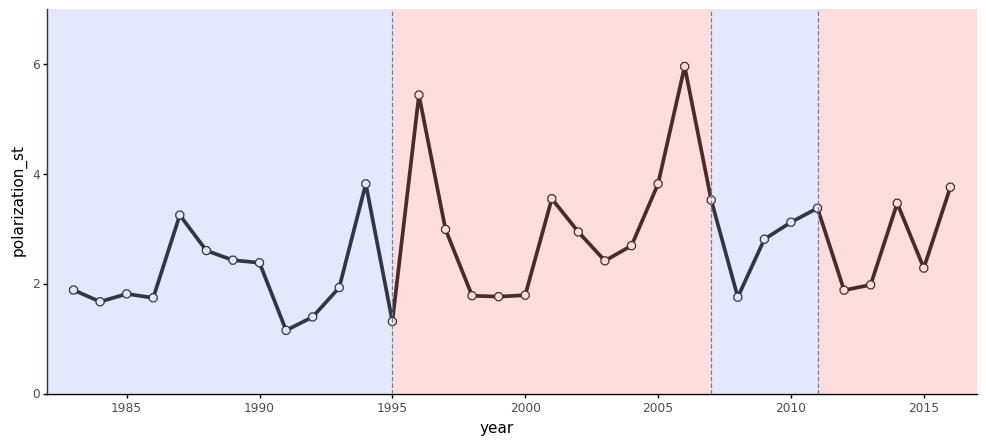

<ggplot: (8770219213487)>

In [198]:
(
    ggplot(most_polarized,aes(x='year',y='polarization_st')) + 
    geoms.geom_line(size=1.5) +
    geoms.geom_point(size=3,fill='white',alpha=1,shape='8') + 
    annotate('rect',xmin=1982,xmax=1995,ymin=0,ymax=7,fill='#a5b3f7',alpha=0.3) + 
    annotate('rect',xmin=1995,xmax=2007,ymin=0,ymax=7,fill='#fc8f8f',alpha=0.3) + 
    annotate('rect',xmin=2007,xmax=2011,ymin=0,ymax=7,fill='#a5b3f7',alpha=0.3) + 
    annotate('rect',xmin=2011,xmax=2017,ymin=0,ymax=7,fill='#fc8f8f',alpha=0.3) + 
    annotate('segment',x=1995,xend=1995,y=0,yend=7,color='grey',linetype='dashed') + 
    annotate('segment',x=2007,xend=2007,y=0,yend=7,color='grey',linetype='dashed') + 
    annotate('segment',x=2011,xend=2011,y=0,yend=7,color='grey',linetype='dashed') + 
    theme(panel_background=element_blank(),
          axis_line=element_line(),
         figure_size=(12,5)) +
    scales.scale_x_continuous(expand=[0,0],breaks=np.arange(1980,2020,5)) + 
    scales.scale_y_continuous(expand=(0, 0))
)

In [199]:
most_polarized

,,year,topic,partisanship,polarization,partisanship_st,polarization_st
0,17,1983,research_technology,0.154420,0.186692,2.369847,1.890887
1,57,1984,arts,0.094999,0.179100,1.437759,1.677796
2,62,1985,social_security,-0.101892,0.184193,-1.650707,1.820735
3,87,1986,social_security,0.018803,0.181635,0.242546,1.748942
4,138,1987,waters_coastguard,0.099396,0.235232,1.506743,3.253264
5,151,1988,transportation,-0.070032,0.212236,-1.150936,2.607826
6,206,1989,civil_rights_flag,0.182976,0.206024,2.817790,2.433491
7,215,1990,central_america,0.127774,0.204353,1.951875,2.386579
8,257,1991,research_technology,0.136037,0.160546,2.081498,1.157035
9,281,1992,international_humanRights,-0.088949,0.169245,-1.447675,1.401177


In [56]:
Dem_top_year = corr_df.groupby('year',as_index=False).apply(lambda x: x.sort_values(by='correlation').head(2)).reset_index()
Rep_top_year = corr_df.groupby('year',as_index=False).apply(lambda x: x.sort_values(by='correlation').tail(2)).reset_index()

top_terms = pd.concat([Dem_top_year,Rep_top_year]).sort_values(by=['year','party_slant'])

In [60]:
top_terms.loc[top_terms.party_slant == 'R'].head(40)

,level_0,level_1,term,correlation,SE,freq,weighted,year,topic,party_slant
0,0,30,security,0.347364,0.122082,33,11.463026,1983,research_technology,R
1,0,36,west,0.387560,0.120014,26,10.076558,1983,research_technology,R
2,1,0,nebraska,0.393321,0.098008,17,6.686464,1984,agriculture,R
3,1,50,yield,0.399887,0.095558,27,10.796955,1984,arts,R
4,2,89,listen,0.344689,0.081093,10,3.446894,1985,food_assistance,R
5,2,46,system,0.363664,0.080472,46,16.728547,1985,food_assistance,R
6,3,111,difference,0.291887,0.068847,14,4.086413,1986,international_humanRights,R
7,3,40,leave,0.293941,0.064442,160,47.030616,1986,central_america,R
8,4,6,secretary,0.431474,0.150354,14,6.040642,1987,waters_coastguard,R
9,4,23,find,0.463142,0.147714,13,6.020848,1987,waters_coastguard,R


In [63]:
Dem_top_topic_terms = corr_df.groupby(['year','topic'],as_index=False).apply(lambda x: x.sort_values(by='correlation').head(1)).reset_index()
Rep_top_topic_terms = corr_df.groupby(['year','topic'],as_index=False).apply(lambda x: x.sort_values(by='correlation').tail(1)).reset_index()


In [64]:
Rep_top_topic_terms

,level_0,level_1,term,correlation,SE,freq,weighted,year,topic,party_slant
0,0,68,rise_opposition,0.250839,0.078006,22,5.518450,1983,agriculture,R
1,1,101,africa,0.300501,0.073152,9,2.704511,1983,central_america,R
2,2,22,suspension,0.234840,0.073270,7,1.643877,1983,civil_rights,R
3,3,249,lengthy,0.217548,0.055616,8,1.740388,1983,defense_weapons,R
4,4,73,belt,0.215075,0.079213,8,1.720604,1983,domestic_commerce,R
...,...,...,...,...,...,...,...,...,...,...
1156,1156,35,regulation,0.196850,0.105114,168,33.070721,2016,small_business,R
1157,1157,64,simple,0.252376,0.092682,21,5.299895,2016,taxes,R
1158,1158,6,want_thank,0.176063,0.121169,26,4.577635,2016,transportation_air,R
1159,1159,72,first,0.235222,0.080715,108,25.404000,2016,tribute,R
